# Análise de Produção de Procedimentos de Saúde — Santa Rosa

---




## Índice

1. [Introdução](#introducao)  
2. [Etapas de Análise](#etapas)  
   - [1. Análise Exploratória de Dados (EDA)](#eda)  
   - [2. Limpeza e Preparação dos Dados](#limpeza)  
   - [3. Análises Estratégicas para o Gestor de Saúde do Município](#analises)  
     - [3.1 Volume e Perfil dos Procedimentos](#volume)  
     - [3.2 Produção por Estabelecimento de Saúde](#estabelecimento)  
     - [3.3 Perfil Demográfico e Epidemiológico](#perfil)  
     - [3.4 Fluxos Regionais e Acesso](#fluxos)  
     - [3.5 Recursos Financeiros](#recursos)  
     - [3.6 Foco em Áreas Críticas](#foco)  
     - [3.7 Comparações e Tendências](#comparacoes)  
4. [Anexos e Referências](#anexos)

---



<a id="introducao"></a>
## 1. Introdução

Este notebook organiza, sem código, os resultados e a apresentação das análises solicitadas sobre os procedimentos ambulatoriais e hospitalares realizados em **Santa Rosa**.  
Use cada seção para colar tabelas, gráficos e observações. Indicamos também queries SQL e/ou procedimentos ETL sugeridos quando pertinente.



<a id="etapas"></a>
## 2. Etapas de Análise (resumo)

Abaixo estão as etapas principais. Em cada sub-seção há espaço para: *objetivo*, *método/consulta usada*, *tabelas/resultados* e *insights*.



<a id="eda"></a>
### 2.1 Análise Exploratória de Dados (EDA)

**Objetivos**
- Conhecer dimensão do dataset e tipos de variáveis.
- Obter estatísticas descritivas iniciais.
- Identificar valores faltantes e inválidos.


**Detecção de problemas**
- Valores ausentes (NaN / vazio) — listar colunas e contagens.
- Valores inválidos (ex.: idade fora da faixa, sexo ≠ M/F, CIDs inconsistentes) — listar exemplos e contagens.



In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector

# Conexão com o banco de dados
connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
DESCRIBE pars;

"""
cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)
print("Estrutura da tabela 'pars':")
display(df)



KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector

# Conexão com o banco de dados
connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
DESCRIBE s_cid;

"""
cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)
print("Estrutura da tabela 's_cid':")
display(df)



Estrutura da tabela 's_cid':


,Field,Type,Null,Key,Default,Extra
0,cd_cod,char(4),YES,,None,
1,opc,char(1),YES,,None,
2,cat,char(1),YES,,None,
3,subcat,char(1),YES,,None,
4,cd_descr,char(50),YES,,None,
5,restrsexo,char(1),YES,,None,
6,campos_rad,char(3),YES,,None,
7,estadio,char(1),YES,,None,
8,repete_rad,char(1),YES,,None,


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector

# Conexão com o banco de dados
connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
DESCRIBE tb_sigtaw;

"""
cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)
print("Estrutura da tabela 'tb_sigtaw':")
display(df)

connection.close()

Estrutura da tabela 'tb_sigtaw':


,Field,Type,Null,Key,Default,Extra
0,ip_cod,char(10),YES,,None,
1,ip_dscr,char(150),YES,,None,


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector

# Conexão com o banco de dados
connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
DESCRIBE tb_municip;

"""
cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)
print("Estrutura da tabela 'tb_municip':")
display(df)


Estrutura da tabela 'tb_municip':


,Field,Type,Null,Key,Default,Extra
0,co_municip,char(6),YES,,None,
1,co_municdv,char(7),YES,,None,
2,co_status,char(7),YES,,None,
3,co_tipo,char(7),YES,,None,
4,ds_nome,char(48),YES,,None,
5,ds_nomepad,char(48),YES,,None,
6,ds_observ,char(1),YES,,None,
7,co_regiao,char(1),YES,,None,
8,co_uf,char(2),YES,,None,
9,co_alter,char(1),YES,,None,



<a id="limpeza"></a>
### 2.2 Limpeza e Preparação dos Dados

**Objetivos**
- Corrigir problemas identificados na EDA.
- Produzir um dataset pronto para análise estratégica.

**Estratégias propostas**
- Valores nulos: apresentar contagem e a ação aplicada (apagar linhas ou preencher com "Não informado").
- Inconsistências: descrição das regras de normalização (ex.: padronizar nomes de municípios, especialidades).
- Duplicações: número de registros duplicados encontrados e ação (remoção).


In [113]:
import mysql.connector

connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

cursor = connection.cursor()

# 1. PA_SEXO inválido → OMISSO
QUERY1 = """
UPDATE pars 
SET PA_SEXO = 'OMISSO'
WHERE PA_SEXO NOT IN ('M', 'F') OR PA_SEXO IS NULL;
"""
cursor.execute(QUERY1)

# 2. PA_RACACOR = 0 → OMISSO
QUERY2 = """
UPDATE pars 
SET PA_RACACOR = 'OMISSO'
WHERE PA_RACACOR = 0 OR PA_RACACOR IS NULL;
"""
cursor.execute(QUERY2)

# 3. Idade inválida → OMISSO
QUERY3 = """
UPDATE pars 
SET PA_IDADE = 'OMISSO'
WHERE PA_IDADE >= 200 OR PA_IDADE IS NULL;
"""
cursor.execute(QUERY3)

connection.commit()

cursor.close()
connection.close()

print("Atualizações aplicadas com sucesso ✅")


Atualizações aplicadas com sucesso ✅



<a id="analises"></a>
## 3. Análises Estratégicas para o Gestor de Saúde do Município

Nesta seção, cole resultados, tabelas e gráficos finais que respondam às perguntas estratégicas.



<a id="volume"></a>
### 3.1 Volume e Perfil dos Procedimentos

**Perguntas-chave**
- Quantos procedimentos ambulatoriais foram realizados em Santa Rosa no último mês, trimestre e ano?

**Observação técnica**
- Gerar a granularidade temporal a partir do arquivo `04-gera-dimtempo-mysql.sql` (usar dim_tempo para agrupar por mês/trimestre/ano).



<a id="estabelecimento"></a>
### 3.2 Produção por Estabelecimento de Saúde

**Perguntas-chave**
- Ranking de produção por estabelecimento (Hospital Vida & Saúde, UBS, clínicas conveniadas).
- Comparar volume de procedimentos aprovados × produzidos.
- Avaliar taxa de procedimentos produzidos (produzidos / aprovados).


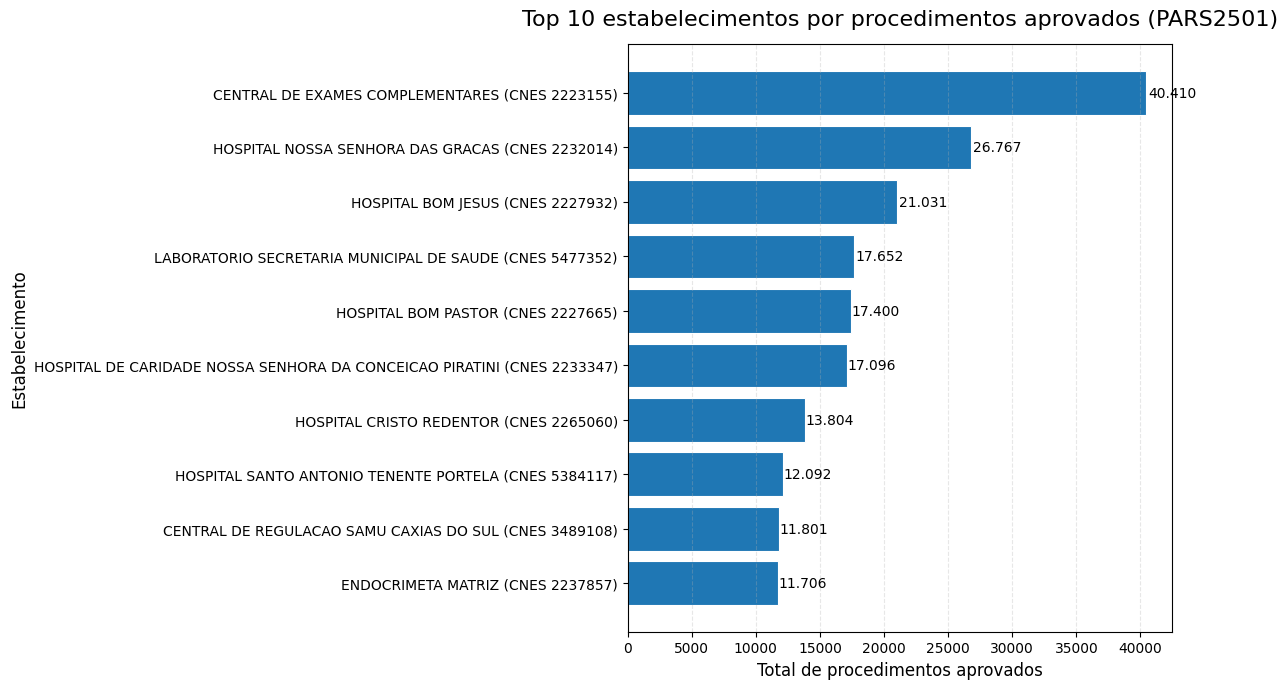

In [114]:
# Ranking de produção por estabelecimento
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
    

connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
 
SELECT 
    p.PA_CODUNI AS cnes,
    c.fantasia AS estabelecimento,
    SUM(p.PA_QTDAPR) AS total_procedimentos
FROM pars p
LEFT JOIN CADGERRS c 
    ON c.cnes = p.PA_CODUNI
GROUP BY 
    p.PA_CODUNI,
    c.fantasia
ORDER BY 
    total_procedimentos DESC
LIMIT 10;

"""
cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)
df['total_procedimentos'] = pd.to_numeric(df['total_procedimentos'], errors='coerce').fillna(0).astype(int)
df['estabelecimento'] = df['estabelecimento'].fillna('Sem nome (CNES ' + df['cnes'].astype(str) + ')')

# Ordenar do menor para o maior para gráfico horizontal (melhor leitura)
df_plot = df.sort_values('total_procedimentos', ascending=True)

# Texto curto combinando nome e CNES para evitar nomes iguais
df_plot['label'] = df_plot.apply(
    lambda r: f"{r['estabelecimento']} (CNES {r['cnes']})", axis=1
)

# Figura
plt.figure(figsize=(12, 7))
bars = plt.barh(
    df_plot['label'],
    df_plot['total_procedimentos'],
    color='#1f77b4',
    edgecolor='white',
    linewidth=0.8
)

# Rótulos e título
plt.title('Top 10 estabelecimentos por procedimentos aprovados (PARS2501)', fontsize=16, pad=14)
plt.xlabel('Total de procedimentos aprovados', fontsize=12)
plt.ylabel('Estabelecimento', fontsize=12)



# Adiciona valores no fim de cada barra
for bar in bars:
    valor = int(bar.get_width())
    plt.text(
        bar.get_width() * 1.005,
        bar.get_y() + bar.get_height()/2,
        f'{valor:,}'.replace(',', '.'),
        va='center',
        fontsize=10
    )

# Grid sutil no eixo X
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Ajustes finais
plt.tight_layout()

# Salvar e mostrar
plt.savefig('ranking_estabelecimentos_top10.png', dpi=150, bbox_inches='tight')
plt.show()


<a id="perfil"></a>
### 3.3 Perfil Demográfico e Epidemiológico da População Atendida

**Perguntas-chave**
- Distribuição por sexo e faixa etária.
- Principais diagnósticos (CIDs) atendidos.
- Procedimentos recorrentes para doenças crônicas.

**Tabelas / Gráficos a incluir**
- Pirâmide etária / histograma por faixa etária.
- Tabela: top 10 CIDs por número de atendimentos.
- Tabela/Gráfico: procedimentos recorrentes por CID (ex.: hipertensão, diabetes).


/tmp/ipykernel_4978/1851156833.py:42: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(QUERY, connection)


<Figure size 1200x700 with 0 Axes>

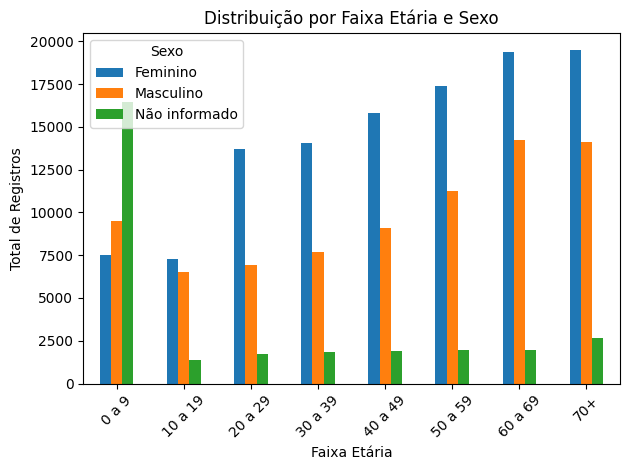

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
SELECT 
    CASE 
        WHEN PA_SEXO = 'M' THEN 'Masculino'
        WHEN PA_SEXO = 'F' THEN 'Feminino'
        ELSE 'Não informado'
    END AS Sexo,
    CASE 
        WHEN CAST(PA_IDADE AS UNSIGNED) BETWEEN 0 AND 9 THEN '0 a 9'
        WHEN CAST(PA_IDADE AS UNSIGNED) BETWEEN 10 AND 19 THEN '10 a 19'
        WHEN CAST(PA_IDADE AS UNSIGNED) BETWEEN 20 AND 29 THEN '20 a 29'
        WHEN CAST(PA_IDADE AS UNSIGNED) BETWEEN 30 AND 39 THEN '30 a 39'
        WHEN CAST(PA_IDADE AS UNSIGNED) BETWEEN 40 AND 49 THEN '40 a 49'
        WHEN CAST(PA_IDADE AS UNSIGNED) BETWEEN 50 AND 59 THEN '50 a 59'
        WHEN CAST(PA_IDADE AS UNSIGNED) BETWEEN 60 AND 69 THEN '60 a 69'
        WHEN CAST(PA_IDADE AS UNSIGNED) >= 70 THEN '70+'
        ELSE 'Idade inválida ou nula'
    END AS Faixa_Etaria,
    COUNT(*) AS Total,
    ROUND(
        COUNT(*) * 100.0 / (SELECT COUNT(*) FROM pars WHERE PA_SEXO IS NOT NULL),
        2
    ) AS Percentual
FROM pars
WHERE PA_IDADE IS NOT NULL
GROUP BY Sexo, Faixa_Etaria
ORDER BY Sexo, MIN(CAST(PA_IDADE AS UNSIGNED));

"""

df = pd.read_sql(QUERY, connection)

# Organiza os dados para o gráfico
pivot = df.pivot(index='Faixa_Etaria', columns='Sexo', values='Total').fillna(0)

plt.figure(figsize=(12,7))
pivot.plot(kind='bar')
plt.title('Distribuição por Faixa Etária e Sexo')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<a id="fluxos"></a>
### 3.4 Fluxos Regionais e Acesso

**Perguntas-chave**
- Municípios de origem dos pacientes atendidos em Santa Rosa.
- Quantos atendimentos feitos em Ijuí são de moradores de outros municípios.
- Identificação de regiões dependentes do Hospital Vida & Saúde ou UBSs locais.

**Espaço para resultados**
- Top 10 municípios de origem: (colar tabela)
- Percentual de pacientes de fora em Ijuí: `______%`


In [118]:
# Quantos atendimentos feitos em Ijuí são de moradores de outros municipios
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
    

connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)


QUERY = """
select (
select * from PARS2501 p
where p.PA_MUNPCN = "431020" and p.PA_MNDIF = 1
union all
select * from pars p
where p.PA_MUNPCN = "431020" and p.PA_MNDIF = 1
union all
select * from pars2412 p
where p.PA_MUNPCN = "431020" and p.PA_MNDIF = 1
)
union all

"""

cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)
print(df)

ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '' at line 11


<a id="recursos"></a>
### 3.5 Recursos Financeiros

**Perguntas-chave**
- Total de valores aprovados pelo SUS para Santa Rosa × valores produzidos.
- Diferença entre produzidos e aprovados.
- Evolução do gasto médio por procedimento.

**Tabelas / Gráficos a incluir**
- Tabela resumo: aprovados vs produzidos por período.
- Gráfico: evolução do gasto médio por procedimento (mês/trimestre).
- KPI: diferença absoluta e percentual entre aprovados e produzidos.

**Espaço para resultados**
- Total aprovados (ano): `R$ ______`  
- Total produzidos (ano): `R$ ______`  
- Diferença: `R$ ______` (`__%`)



<a id="foco"></a>
### 3.6 Foco em Áreas Críticas

**Temas**
- Oncologia: quimioterapia e radioterapia (aprovados × produzidos).
- Saúde mental: atendimentos psiquiátricos e psicológicos.
- Atenção básica: consultas e procedimentos nas UBS, acompanhamento de doenças crônicas.

**Tabelas / Gráficos a incluir**
- Tabela: aprovados vs produzidos em oncologia (quimioterapia, radioterapia).
- Série temporal: atendimentos em saúde mental.
- Indicadores de atenção básica: consultas por usuário no último ano, acompanhamento de diabéticos/hipertensos.

**Espaço para resultados**
- Aprovados × produzidos (oncologia): (colar tabela)
- Observações e recomendações operacionais.



<a id="comparacoes"></a>
### 3.7 Comparações e Tendências

**Perguntas-chave**
- Comparar Santa Rosa com municípios da região (Ijuí, Santo Ângelo).
- A demanda de Santa Rosa cresce acima da média regional?
- Identificar tendências (ex.: envelhecimento → mais procedimentos cardiológicos e oncológicos).


In [ ]:
# Validar Santa Rosa e municipios da região (quantidade de consultas por cidade)
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
    

connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

QUERY = """
SELECT 
    m.ds_nome AS municipio,
    SUM(t.PA_QTDAPR) AS total_consultas
FROM (
        SELECT PA_MUNPCN, PA_DOCORIG, PA_QTDAPR
        FROM pars
        
        UNION ALL
        SELECT PA_MUNPCN, PA_DOCORIG, PA_QTDAPR
        FROM pars2412
        
        UNION ALL
        SELECT PA_MUNPCN, PA_DOCORIG, PA_QTDAPR
        FROM pars2501
     ) AS t
LEFT JOIN tb_municip m 
    ON m.co_municip = t.PA_MUNPCN
WHERE 1=1
  AND t.PA_DOCORIG IN ('B','I')  
  AND t.PA_MUNPCN IN (
      '431720',  -- Santa Rosa
      '430850',  -- Giruá
      '430960',  -- Horizontina
      '430020',  -- Alecrim
      '431790',  -- Santo Cristo
      '431020'   -- Ijuí
  )
GROUP BY 
    m.ds_nome
ORDER BY 
    total_consultas DESC;
"""

cursor = connection.cursor(dictionary=True)
cursor.execute(QUERY)
data = cursor.fetchall()
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

# barras horizontais
plt.barh(df["municipio"], df["total_consultas"])

# média regional
media_regional = float(df["total_consultas"].mean())

# linha vertical da média
plt.axvline(media_regional, color='red', linestyle='--', linewidth=1.5)

# texto da média
plt.text(
    media_regional,
    -0.5,
    f"Média regional: {int(media_regional):,}".replace(",", "."),
    color='red',
    fontsize=11,
    fontweight='bold',
    ha='center'
)

# título estilizado
plt.title("Consultas Ambulatoriais por Município", fontsize=16, fontweight="bold")

# labels dos eixos
plt.xlabel("Total de Consultas", fontsize=12)
plt.ylabel("Município", fontsize=12)

# adicionar valores ao lado das barras
for index, value in enumerate(df["total_consultas"]):
    v = float(value)
    plt.text(v + (v * 0.01), index, f"{int(v):,}".replace(",", "."), va="center")

# grid discreto
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()




KeyboardInterrupt: 


<a id="anexos"></a>
## 4. Anexos e Referências

- Arquivos SQL referenciados:
  - `04-gera-dimtempo-mysql.sql` — usar para gerar dimensão de tempo e granularidades.
- Logs e decisões de limpeza (incluir arquivo CSV ou planilha com auditoria).
- Scripts/consultas utilizados (colar ou anexar em arquivos separados).
- Glossário de termos e siglas (SUS, UBS, CID, etc).
